## Capstone Project - Columbia DSI - DiDi - Spring 2021
#### Authors:  Danyang Han,  Anita Pinto,  Elizabeth Yum
This file is used to inspect the supply of drivers based on historical data
Reference: https://github.com/skyetim/didi-vehicle-repositioning-strategy(Fall 2020 Capstone Project) 

In [7]:
import pandas as pd 
import datetime as dt 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from datetime import time
from matplotlib.widgets import Slider
#from sqlalchemy import create_engine
import fiona
import shapely
from shapely.geometry import shape, mapping, Point, Polygon, MultiPolygon
import networkx as nx
import pickle
from ipywidgets import interact, widgets

ModuleNotFoundError: No module named 'shapely.geometry'

In [2]:
df = pd.read_csv('../data/trip_cleaned.csv') 

In [3]:
df['pickup_time_act'] = pd.to_datetime(df['pickup_datetime']).dt.time
df['dropoff_time_act'] = pd.to_datetime(df['dropoff_datetime']).dt.time
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['pickup_date'] = pd.to_datetime(df['pickup_datetime']).dt.date
df['dropoff_date'] = pd.to_datetime(df['dropoff_datetime']).dt.date
df['pickup_date'] = pd.to_datetime(df['pickup_date'])
df['dropoff_date'] = pd.to_datetime(df['dropoff_date'])
df['pickup_time'] = pd.to_datetime(df['pickup_datetime']).dt.time
df['dropoff_time'] = pd.to_datetime(df['dropoff_datetime']).dt.time

df['day_of_week'] = pd.to_datetime(df['pickup_date']).dt.dayofweek

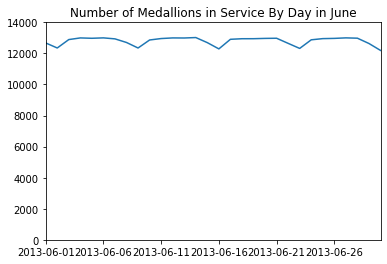

In [47]:
# Graph of count of unique medallions by every day in June

# Unique medallions by day
supplybyday = df[['medallion', 'pickup_day']].drop_duplicates().sort_values(by=['pickup_day'])
supplybyday.head(10)
supplycount = supplybyday['pickup_day'].value_counts(sort=False).sort_index(ascending=True)

# Plot by Day
supplycount.plot(ylim = (0, 14000), title = 'Number of Medallions in Service By Day in June')

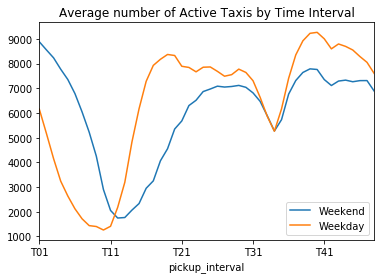

In [141]:
# Average # of unique medallions picking up by time interval and by day of week

# Binning by time interval
def bin_f(x):
    if x < datetime.time(0, 30):
        return "T01"
    elif x < datetime.time(1):
        return "T02"
    elif x < datetime.time(1, 30):
        return "T03"
    elif x < datetime.time(2):
        return "T04"
    elif x < datetime.time(2, 30):
        return "T05"
    elif x < datetime.time(3):
        return "T06"
    elif x < datetime.time(3, 30):
        return "T07"
    elif x < datetime.time(4):
        return "T08"
    elif x < datetime.time(4, 30):
        return "T09"
    elif x < datetime.time(5):
        return "T10"
    elif x < datetime.time(5, 30):
        return "T11"
    elif x < datetime.time(6):
        return "T12"
    elif x < datetime.time(6, 30):
        return "T13"
    elif x < datetime.time(7):
        return "T14"
    elif x < datetime.time(7, 30):
        return "T15"
    elif x < datetime.time(8):
        return "T16"
    elif x < datetime.time(8, 30):
        return "T17"
    elif x < datetime.time(9):
        return "T18"
    elif x < datetime.time(9, 30):
        return "T19"
    elif x < datetime.time(10):
        return "T20"
    elif x < datetime.time(10, 30):
        return "T21"
    elif x < datetime.time(11):
        return "T22"
    elif x < datetime.time(11, 30):
        return "T23"
    elif x < datetime.time(12):
        return "T24"
    elif x  < datetime.time(12, 30):
        return "T25"
    elif x < datetime.time(13):
        return "T26"
    elif x < datetime.time(13, 30):
        return "T27"
    elif x < datetime.time(14):
        return "T28"
    elif x < datetime.time(14, 30):
        return "T29"
    elif x < datetime.time(15):
        return "T30"
    elif x < datetime.time(15, 30):
        return "T31"
    elif x < datetime.time(16):
        return "T32"
    elif x < datetime.time(16, 30):
        return "T33"
    elif x < datetime.time(17):
        return "T34"
    elif x < datetime.time(17, 30):
        return "T35"
    elif x < datetime.time(18):
        return "T36"
    elif x < datetime.time(18, 30):
        return "T37"
    elif x < datetime.time(19):
        return "T38"
    elif x < datetime.time(19, 30):
        return "T39"
    elif x < datetime.time(20):
        return "T40"
    elif x < datetime.time(20, 30):
        return "T41"
    elif x < datetime.time(21):
        return "T42"
    elif x < datetime.time(21, 30):
        return "T43"
    elif x < datetime.time(22):
        return "T44"
    elif x < datetime.time(22, 30):
        return "T45"
    elif x < datetime.time(23):
        return "T46"
    elif x < datetime.time(23, 30):
        return "T47"
    else:
        return "T48"

df["pickup_interval"] = df["pickup_time"].apply(bin_f)

# Selecting and grouping
supplybypuint = df[['medallion', 'pickup_day', 'pickup_interval', 'pickup_weekday']].drop_duplicates().sort_values(by=['pickup_day', 'pickup_interval'])
avgsupplybypuint = supplybypuint.groupby(['pickup_day', 'pickup_interval', 'pickup_weekday'],as_index=False).\
    count().groupby(['pickup_interval', 'pickup_weekday'], as_index=False).mean()

# Graphing
fig, ax = plt.subplots()
# avgsupplybypuint.groupby('pickup_weekday').plot(kind='line',x='pickup_interval',y='medallion')
avgsupplybypuint.groupby('pickup_weekday').plot(x='pickup_interval',\
                                                y='medallion', ax=ax, legend=True, \
                                                title = 'Average number of Active Taxis by Time Interval')
plt.legend(['Weekend', 'Weekday'])

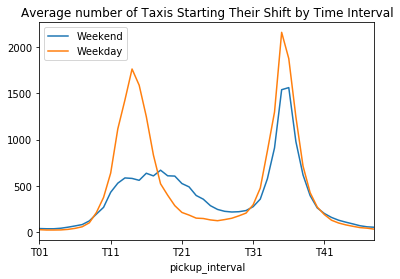

In [161]:
# Average # of Taxis Starting Their Shift by Time Zone
firstpickupbypuint = df[df['first_pickup'] == 1][['medallion', 'pickup_day', 'pickup_interval', 'pickup_weekday', 'pickup_taxizone_id']].sort_values(by=['pickup_day', 'pickup_interval'])
avgpickupbypuint = firstpickupbypuint.groupby(['pickup_day', 'pickup_interval', 'pickup_weekday'],as_index=False).\
    count().groupby(['pickup_interval', 'pickup_weekday'], as_index=False).mean()

# Graphing
fig, ax = plt.subplots()
avgpickupbypuint.groupby('pickup_weekday').plot(x='pickup_interval',\
                                                y='medallion', ax=ax, legend=True, \
                                                title = 'Average number of Taxis Starting Their Shift by Time Interval')
plt.legend(['Weekend', 'Weekday'])

In [200]:
# Non-uniqueness of taxi medallions by pickup day... some taxis have multiple shifts per day 
avgpickupbypuint.groupby('pickup_weekday').sum()

firstpickupbypuint[['pickup_day','medallion','pickup_weekday']].groupby(['pickup_day','medallion']).count()['pickup_weekday'].value_counts()

2    249401
1    117036
3      5750
4        90
5         1
Name: pickup_weekday, dtype: int64

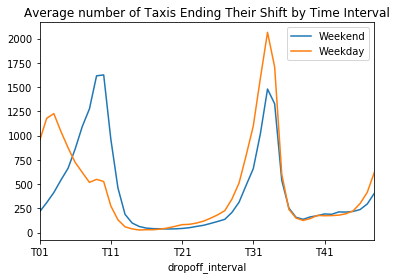

In [202]:
# Average # of Taxis Ending Their Shift by Time Zone
df["dropoff_interval"] = df["dropoff_time"].apply(bin_f)

lastdropoffbydoint = df[df['last_dropoff'] == 1][['medallion', 'dropoff_day', 'dropoff_interval', 'dropoff_weekday']].sort_values(by=['dropoff_day', 'dropoff_interval'])
avgdropoffbydoint = lastdropoffbydoint.groupby(['dropoff_day', 'dropoff_interval', 'dropoff_weekday'],as_index=False).\
    count().groupby(['dropoff_interval', 'dropoff_weekday'], as_index=False).mean()

# Graphing
fig, ax = plt.subplots()
avgdropoffbydoint.groupby('dropoff_weekday').plot(x='dropoff_interval',\
                                                y='medallion', ax=ax, legend=True, \
                                                title = 'Average number of Taxis Ending Their Shift by Time Interval')
plt.legend(['Weekend', 'Weekday'])

In [ ]:
# Distribution of Taxi's Starting Pickup Location



In [159]:
avgpickupbypuint

,pickup_interval,pickup_weekday,medallion,pickup_taxizone_id
0,T01,0,37.555556,37.555556
1,T01,1,25.350000,25.350000
2,T02,0,35.444444,35.444444
3,T02,1,21.900000,21.900000
4,T03,0,35.333333,35.333333
5,T03,1,21.850000,21.850000
6,T04,0,41.000000,41.000000
7,T04,1,22.900000,22.900000
8,T05,0,52.444444,52.444444
9,T05,1,28.650000,28.650000


In [157]:
firstpickupbypuint

,medallion,pickup_day,pickup_interval,pickup_weekday,pickup_taxizone_id
1435185,2013003211,2013-06-01,T14,0,132.0
4479098,2013010222,2013-06-01,T14,0,48.0
224240,2013000513,2013-06-01,T15,0,158.0
2197005,2013004914,2013-06-01,T15,0,114.0
3328617,2013010116,2013-06-01,T15,0,242.0
4901375,2013000688,2013-06-01,T15,0,144.0
10105534,2013011351,2013-06-01,T15,0,151.0
930827,2013002081,2013-06-01,T16,0,74.0
4077497,2013009234,2013-06-01,T16,0,138.0
4194474,2013009517,2013-06-01,T16,0,68.0


In [133]:
df.columns

# Taxis Starting Shift

# Taxis Starting Location

# Taxis Ending Shift

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'pickup_taxizone_id',
       'dropoff_taxizone_id', 'pickup_datetime_next', 'dropoff_datetime_next',
       'payment_type', 'fare_amount', 'surcharge', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount', 'trip_time', 'delta', 'last_dropoff',
       'first_pickup', 'dropoff_time', 'pickup_time', 'dropoff_day',
       'pickup_day', 'pickup_weekday', 'dropoff_weekday', 'pickup_time_act',
       'dropoff_time_act', 'pickup_date', 'dropoff_date', 'day_of_week',
       'pickup_interval'],
      dtype='object')

In [84]:
# Average of First Pickup by Interval and Zone

datetime.time(0, 30)

In [82]:

# df['pickup_time'][0]
time(hour=3,minute=30)

datetime.time(3, 30)

In [80]:
time

datetime.time

TypeError: <class 'datetime.time'> is not convertible to datetime

In [6]:
df.shape

(13885739, 35)

In [7]:
df.head(10)

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,...,last_dropoff,first_pickup,dropoff_time,pickup_time,dropoff_day,pickup_day,pickup_weekday,dropoff_weekday,pickup_time_act,dropoff_time_act
0,2013000001,2013000001,VTS,1,2013-06-24 18:55:00,2013-06-24 19:01:00,1,0.97,-73.992531,40.724052,...,0,0.0,19:00:00,19:00:00,2013-06-24,2013-06-24,1,1,18:55:00,19:01:00
1,2013000001,2013000001,VTS,1,2013-06-24 19:12:00,2013-06-24 19:30:00,1,3.04,-73.982498,40.745617,...,0,0.0,19:30:00,19:15:00,2013-06-24,2013-06-24,1,1,19:12:00,19:30:00
2,2013000001,2013000001,VTS,1,2013-06-24 19:45:00,2013-06-24 20:10:00,2,4.17,-73.981850,40.768753,...,0,0.0,20:15:00,19:45:00,2013-06-24,2013-06-24,1,1,19:45:00,20:10:00
3,2013000001,2013000001,VTS,1,2013-06-24 20:17:00,2013-06-24 20:28:00,1,2.35,-73.988129,40.738098,...,0,0.0,20:30:00,20:15:00,2013-06-24,2013-06-24,1,1,20:17:00,20:28:00
4,2013000001,2013000001,VTS,1,2013-06-24 20:30:00,2013-06-24 20:35:00,1,1.24,-73.961098,40.760826,...,0,0.0,20:30:00,20:30:00,2013-06-24,2013-06-24,1,1,20:30:00,20:35:00
5,2013000001,2013000001,VTS,1,2013-06-24 20:37:00,2013-06-24 20:49:00,2,2.60,-73.955383,40.776684,...,0,0.0,20:45:00,20:30:00,2013-06-24,2013-06-24,1,1,20:37:00,20:49:00
6,2013000001,2013000001,VTS,1,2013-06-24 20:52:00,2013-06-24 21:03:00,1,2.36,-73.979774,40.781242,...,0,0.0,21:00:00,20:45:00,2013-06-24,2013-06-24,1,1,20:52:00,21:03:00
7,2013000001,2013000001,VTS,1,2013-06-24 22:07:00,2013-06-24 22:13:00,2,0.82,-73.929214,40.753971,...,1,0.0,22:15:00,22:00:00,2013-06-24,2013-06-24,1,1,22:07:00,22:13:00
8,2013000001,2013000001,VTS,1,2013-06-26 17:24:00,2013-06-26 17:35:00,1,0.86,-73.971581,40.757946,...,0,1.0,17:30:00,17:30:00,2013-06-26,2013-06-26,1,1,17:24:00,17:35:00
9,2013000001,2013000001,VTS,1,2013-06-26 17:36:00,2013-06-26 17:49:00,2,1.23,-73.972939,40.748775,...,0,0.0,17:45:00,17:30:00,2013-06-26,2013-06-26,1,1,17:36:00,17:49:00


In [8]:
#delect all rows where exact pick_up_time is not recorded 
df = df.drop(df[df['pickup_datetime'].dt.time == dt.time(0,0)].index)
df.shape

(13879785, 35)

In [9]:
df = df.drop(df[df['dropoff_datetime'].dt.time == dt.time(0,0)].index)
df.shape

(13873809, 35)

In [10]:
df['pickup_date'] = pd.to_datetime(df['pickup_datetime']).dt.date
df['dropoff_date'] = pd.to_datetime(df['dropoff_datetime']).dt.date
df['pickup_date'] = pd.to_datetime(df['pickup_date'])
df['dropoff_date'] = pd.to_datetime(df['dropoff_date'])

In [11]:
df.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'pickup_taxizone_id',
       'dropoff_taxizone_id', 'pickup_datetime_next', 'dropoff_datetime_next',
       'payment_type', 'fare_amount', 'surcharge', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount', 'trip_time', 'delta', 'last_dropoff',
       'first_pickup', 'dropoff_time', 'pickup_time', 'dropoff_day',
       'pickup_day', 'pickup_weekday', 'dropoff_weekday', 'pickup_time_act',
       'dropoff_time_act', 'pickup_date', 'dropoff_date'],
      dtype='object')

In [12]:
#Choose top rides taxi zone with max pickups 
top_pickup_zones = list(df["pickup_taxizone_id"].value_counts().index)[0:50]
print(top_pickup_zones)
#my_taxi_zone = 68 #top_zones[0]
#print(my_taxi_zone)

[237.0, 79.0, 170.0, 162.0, 161.0, 48.0, 234.0, 230.0, 236.0, 186.0, 142.0, 68.0, 107.0, 163.0, 164.0, 239.0, 141.0, 249.0, 138.0, 229.0, 231.0, 90.0, 113.0, 263.0, 100.0, 148.0, 238.0, 140.0, 132.0, 158.0, 114.0, 246.0, 233.0, 43.0, 144.0, 137.0, 262.0, 50.0, 143.0, 211.0, 13.0, 87.0, 151.0, 75.0, 125.0, 166.0, 255.0, 261.0, 224.0, 4.0]


In [13]:
#Choose top rides taxi zone with max dropoffs
top_dropoff_zones = list(df["dropoff_taxizone_id"].value_counts().index)[0:50]
print(top_dropoff_zones)

[161.0, 230.0, 170.0, 236.0, 162.0, 237.0, 234.0, 48.0, 79.0, 186.0, 68.0, 142.0, 163.0, 164.0, 107.0, 141.0, 239.0, 249.0, 246.0, 231.0, 263.0, 238.0, 100.0, 229.0, 140.0, 90.0, 113.0, 233.0, 158.0, 138.0, 137.0, 114.0, 43.0, 148.0, 262.0, 144.0, 50.0, 211.0, 143.0, 13.0, 75.0, 87.0, 132.0, 151.0, 74.0, 166.0, 125.0, 7.0, 261.0, 41.0]


In [14]:
mid_pickup_zones = list(df["pickup_taxizone_id"].value_counts().index)[70:153]
print(mid_pickup_zones)

[146.0, 223.0, 244.0, 116.0, 66.0, 42.0, 152.0, 179.0, 260.0, 49.0, 37.0, 189.0, 129.0, 17.0, 193.0, 12.0, 95.0, 82.0, 106.0, 61.0, 70.0, 36.0, 243.0, 83.0, 194.0, 10.0, 217.0, 168.0, 196.0, 228.0, 188.0, 225.0, 195.0, 26.0, 202.0, 93.0, 89.0, 190.0, 54.0, 247.0, 127.0, 130.0, 219.0, 28.0, 133.0, 215.0, 157.0, 257.0, 62.0, 207.0, 134.0, 92.0, 14.0, 216.0, 198.0, 197.0, 56.0, 34.0, 119.0, 159.0, 69.0, 8.0, 173.0, 258.0, 165.0, 227.0, 85.0, 160.0, 76.0, 135.0, 169.0, 250.0, 235.0, 220.0, 178.0, 177.0, 126.0, 22.0, 192.0, 91.0, 102.0, 72.0, 123.0]


In [15]:
df.head(20)

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,...,dropoff_time,pickup_time,dropoff_day,pickup_day,pickup_weekday,dropoff_weekday,pickup_time_act,dropoff_time_act,pickup_date,dropoff_date
0,2013000001,2013000001,VTS,1,2013-06-24 18:55:00,2013-06-24 19:01:00,1,0.97,-73.992531,40.724052,...,19:00:00,19:00:00,2013-06-24,2013-06-24,1,1,18:55:00,19:01:00,2013-06-24,2013-06-24
1,2013000001,2013000001,VTS,1,2013-06-24 19:12:00,2013-06-24 19:30:00,1,3.04,-73.982498,40.745617,...,19:30:00,19:15:00,2013-06-24,2013-06-24,1,1,19:12:00,19:30:00,2013-06-24,2013-06-24
2,2013000001,2013000001,VTS,1,2013-06-24 19:45:00,2013-06-24 20:10:00,2,4.17,-73.981850,40.768753,...,20:15:00,19:45:00,2013-06-24,2013-06-24,1,1,19:45:00,20:10:00,2013-06-24,2013-06-24
3,2013000001,2013000001,VTS,1,2013-06-24 20:17:00,2013-06-24 20:28:00,1,2.35,-73.988129,40.738098,...,20:30:00,20:15:00,2013-06-24,2013-06-24,1,1,20:17:00,20:28:00,2013-06-24,2013-06-24
4,2013000001,2013000001,VTS,1,2013-06-24 20:30:00,2013-06-24 20:35:00,1,1.24,-73.961098,40.760826,...,20:30:00,20:30:00,2013-06-24,2013-06-24,1,1,20:30:00,20:35:00,2013-06-24,2013-06-24
5,2013000001,2013000001,VTS,1,2013-06-24 20:37:00,2013-06-24 20:49:00,2,2.60,-73.955383,40.776684,...,20:45:00,20:30:00,2013-06-24,2013-06-24,1,1,20:37:00,20:49:00,2013-06-24,2013-06-24
6,2013000001,2013000001,VTS,1,2013-06-24 20:52:00,2013-06-24 21:03:00,1,2.36,-73.979774,40.781242,...,21:00:00,20:45:00,2013-06-24,2013-06-24,1,1,20:52:00,21:03:00,2013-06-24,2013-06-24
7,2013000001,2013000001,VTS,1,2013-06-24 22:07:00,2013-06-24 22:13:00,2,0.82,-73.929214,40.753971,...,22:15:00,22:00:00,2013-06-24,2013-06-24,1,1,22:07:00,22:13:00,2013-06-24,2013-06-24
8,2013000001,2013000001,VTS,1,2013-06-26 17:24:00,2013-06-26 17:35:00,1,0.86,-73.971581,40.757946,...,17:30:00,17:30:00,2013-06-26,2013-06-26,1,1,17:24:00,17:35:00,2013-06-26,2013-06-26
9,2013000001,2013000001,VTS,1,2013-06-26 17:36:00,2013-06-26 17:49:00,2,1.23,-73.972939,40.748775,...,17:45:00,17:30:00,2013-06-26,2013-06-26,1,1,17:36:00,17:49:00,2013-06-26,2013-06-26


In [23]:
#Choose one taxi zone, get seprate dataframe for pickup info, dropoff info for that taxi zone 
my_taxi_zone = 196 #146 #188 #72 #31 #237 # Mid to High pick up taxizone
#my_taxi_zone = 249 # Mid pick up taxizone
#my_taxi_zone = 31 #224 # Low pick up taxizone
my_date = pd.to_datetime("2013-06-14")
start_time = dt.time(18,0)
end_time = dt.time(19,0)
p_df = df.loc[(df["pickup_taxizone_id"]==my_taxi_zone) & (df["pickup_date"]==my_date),:].sort_values(by=["pickup_time_act"])
d_df = df.loc[(df["dropoff_taxizone_id"]==my_taxi_zone) & (df["dropoff_date"]==my_date),:].sort_values(by=["dropoff_time_act"])

In [19]:
df.dtypes
my_date

Timestamp('2013-06-14 00:00:00')

In [24]:
print(p_df.shape)
#print(p_df.head(300))
print(d_df.shape)

(67, 37)
(187, 37)


In [25]:
#calculate pickup interval between trips in a taxi zone 
p_df["delta_p"] = (pd.to_timedelta(p_df['pickup_time_act'].astype(str)).diff(1).dt.floor('T').dt.total_seconds().div(60))
#pd.to_timedelta(df['pickup_time'].astype(str)).diff(-1).dt.total_seconds().div(60)
#p_df.tail(20)

In [26]:
d_df.head()

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,...,dropoff_time,pickup_time,dropoff_day,pickup_day,pickup_weekday,dropoff_weekday,pickup_time_act,dropoff_time_act,pickup_date,dropoff_date
124357,2013000283,2013000283,VTS,1,2013-06-13 23:39:00,2013-06-14 00:01:00,1,8.46,-73.997536,40.756741,...,00:00:00,23:45:00,2013-06-14,2013-06-13,1,1,23:39:00,00:01:00,2013-06-13,2013-06-14
1829905,2013004078,2013004075,VTS,1,2013-06-13 23:44:00,2013-06-14 00:02:00,1,7.15,-73.986740,40.747688,...,00:00:00,23:45:00,2013-06-14,2013-06-13,1,1,23:44:00,00:02:00,2013-06-13,2013-06-14
6978759,2013005688,2013016314,CMT,1,2013-06-13 23:55:51,2013-06-14 00:04:37,1,2.50,-73.870918,40.731644,...,00:00:00,00:00:00,2013-06-14,2013-06-13,1,1,23:55:51,00:04:37,2013-06-13,2013-06-14
9887516,2013011908,2013023992,CMT,1,2013-06-13 23:25:48,2013-06-14 00:04:41,2,9.90,-73.980690,40.768162,...,00:00:00,23:30:00,2013-06-14,2013-06-13,1,1,23:25:48,00:04:41,2013-06-13,2013-06-14
3736649,2013008411,2013008407,VTS,1,2013-06-13 23:49:00,2013-06-14 00:07:00,2,8.24,-73.980911,40.744690,...,00:00:00,23:45:00,2013-06-14,2013-06-13,1,1,23:49:00,00:07:00,2013-06-13,2013-06-14


In [27]:
### Use the following code later

pick_up_start = dt.time(18,0)
pick_up_end =  dt.time(18,30)
drop_off_start = dt.time(17,30)
drop_off_end =  dt.time(18,30)

count_drop = len(d_df.loc[(d_df["dropoff_time_act"] >= drop_off_start ) & (d_df["dropoff_time_act"] < drop_off_end ), :])
print(count_drop)
count_pick = len(p_df.loc[(p_df["pickup_time_act"] >= pick_up_start ) & (p_df["pickup_time_act"] < pick_up_end ), :])
print(count_drop, count_pick)
plot_pick = p_df.loc[(p_df["pickup_time_act"] >= pick_up_start ) & (p_df["pickup_time_act"] < pick_up_end ), :]

5
5 1


In [28]:
### Drop count calculation in the taxi zone for 15 min intervals 
drop_counts = pd.DataFrame(d_df["dropoff_time"].value_counts())
drop_counts["dropoff_int"] = pd.to_datetime(drop_counts.index)
drop_counts = drop_counts.sort_index()

drop_counts

,dropoff_time,dropoff_int
00:00:00,5,2021-03-11 00:00:00
00:15:00,2,2021-03-11 00:15:00
00:30:00,9,2021-03-11 00:30:00
00:45:00,6,2021-03-11 00:45:00
01:00:00,5,2021-03-11 01:00:00
01:15:00,5,2021-03-11 01:15:00
01:30:00,2,2021-03-11 01:30:00
01:45:00,5,2021-03-11 01:45:00
02:00:00,3,2021-03-11 02:00:00
02:15:00,4,2021-03-11 02:15:00


In [4]:
def get_shift(time, weekday=True, pickup=True):
    if weekday:
        if pickup:
            if (time > dt.time(23, 30)) | (time <= dt.time(11, 30)):
                return 'A'
            else:
                return 'B'
        else:
            if (time > dt.time(8, 30)) & (time <= dt.time(20, 30)):
                return 'A'
            else:
                return 'B'            
    else: ## weekend
        if pickup:
            if (time > dt.time(2, 0)) & (time <= dt.time(14, 0)):
                return 'A'
            else:
                return 'B'
        else:
            if (time > dt.time(10, 0)) & (time <= dt.time(22, 0)):
                return 'A'
            else:
                return 'B'        
        return None

In [5]:
# Trip with Pickups and Dropoffs only
df['norm_pu_time'] = df['pickup_datetime'] - df['pickup_datetime'].dt.normalize()
df['norm_do_time'] = df['dropoff_datetime'] - df['dropoff_datetime'].dt.normalize()
first_last_trip = df.loc[(df['first_pickup'] == 1) | (df['last_dropoff'] == 1)]

In [6]:
first_last_trip

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,...,pickup_day,pickup_weekday,dropoff_weekday,pickup_time_act,dropoff_time_act,pickup_date,dropoff_date,day_of_week,norm_pu_time,norm_do_time
7,2013000001,2013000001,VTS,1,2013-06-24 22:07:00,2013-06-24 22:13:00,2,0.82,-73.929214,40.753971,...,2013-06-24,1,1,22:07:00,22:13:00,2013-06-24,2013-06-24,0,0 days 22:07:00,0 days 22:13:00
8,2013000001,2013000001,VTS,1,2013-06-26 17:24:00,2013-06-26 17:35:00,1,0.86,-73.971581,40.757946,...,2013-06-26,1,1,17:24:00,17:35:00,2013-06-26,2013-06-26,2,0 days 17:24:00,0 days 17:35:00
26,2013000001,2013000001,VTS,1,2013-06-27 00:25:00,2013-06-27 00:44:00,1,4.79,-73.980392,40.721916,...,2013-06-27,1,1,00:25:00,00:44:00,2013-06-27,2013-06-27,3,0 days 00:25:00,0 days 00:44:00
27,2013000001,2013000001,VTS,1,2013-06-27 17:20:00,2013-06-27 17:27:00,1,1.24,-73.971268,40.757866,...,2013-06-27,1,1,17:20:00,17:27:00,2013-06-27,2013-06-27,3,0 days 17:20:00,0 days 17:27:00
55,2013000001,2013000001,VTS,1,2013-06-28 01:09:00,2013-06-28 01:26:00,2,5.87,-73.952744,40.776684,...,2013-06-28,1,1,01:09:00,01:26:00,2013-06-28,2013-06-28,4,0 days 01:09:00,0 days 01:26:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13885237,2013008618,2013038755,CMT,1,2013-06-30 16:39:26,2013-06-30 17:07:02,1,2.10,-73.994621,40.761166,...,2013-06-30,0,0,16:39:26,17:07:02,2013-06-30,2013-06-30,6,0 days 16:39:26,0 days 17:07:02
13885391,2013001337,2013038773,CMT,1,2013-06-30 06:55:50,2013-06-30 07:12:07,1,9.80,-73.957153,40.737961,...,2013-06-30,0,0,06:55:50,07:12:07,2013-06-30,2013-06-30,6,0 days 06:55:50,0 days 07:12:07
13885392,2013001337,2013038773,CMT,1,2013-06-30 14:30:55,2013-06-30 14:53:18,2,3.80,-74.003616,40.722656,...,2013-06-30,0,0,14:30:55,14:53:18,2013-06-30,2013-06-30,6,0 days 14:30:55,0 days 14:53:18
13885450,2013004038,2013038777,VTS,2,2013-06-30 07:31:00,2013-06-30 08:02:00,1,19.98,-73.972900,40.795879,...,2013-06-30,0,0,07:31:00,08:02:00,2013-06-30,2013-06-30,6,0 days 07:31:00,0 days 08:02:00


In [7]:
first_last_trip.loc[(first_last_trip['pickup_weekday']==1) &
                      (first_last_trip['first_pickup']==1) , '_PU_shift'] = first_last_trip.pickup_time\
                                .apply(lambda x: get_shift(x, weekday=True, pickup=True))
first_last_trip.loc[(first_last_trip['dropoff_weekday']==1) &
                      (first_last_trip['last_dropoff']==1), '_DO_shift'] = first_last_trip.dropoff_time\
                                .apply(lambda x: get_shift(x, weekday=True, pickup=False))

## determine shift for weekends
first_last_trip.loc[(first_last_trip['pickup_weekday']==0) &
                      (first_last_trip['first_pickup']==1) , '_PU_shift'] = first_last_trip.pickup_time\
                                .apply(lambda x: get_shift(x, weekday=False, pickup=True))
first_last_trip.loc[(first_last_trip['dropoff_weekday']==0) &
                      (first_last_trip['last_dropoff']==1), '_DO_shift'] = first_last_trip.dropoff_time\
                                .apply(lambda x: get_shift(x, weekday=False, pickup=False))

C:\Users\lizyu\Anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\lizyu\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\lizyu\Anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [8]:
first_last_trip.head(10)

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,...,dropoff_weekday,pickup_time_act,dropoff_time_act,pickup_date,dropoff_date,day_of_week,norm_pu_time,norm_do_time,_PU_shift,_DO_shift
7,2013000001,2013000001,VTS,1,2013-06-24 22:07:00,2013-06-24 22:13:00,2,0.82,-73.929214,40.753971,...,1,22:07:00,22:13:00,2013-06-24,2013-06-24,0,0 days 22:07:00,0 days 22:13:00,NaN,B
8,2013000001,2013000001,VTS,1,2013-06-26 17:24:00,2013-06-26 17:35:00,1,0.86,-73.971581,40.757946,...,1,17:24:00,17:35:00,2013-06-26,2013-06-26,2,0 days 17:24:00,0 days 17:35:00,B,NaN
26,2013000001,2013000001,VTS,1,2013-06-27 00:25:00,2013-06-27 00:44:00,1,4.79,-73.980392,40.721916,...,1,00:25:00,00:44:00,2013-06-27,2013-06-27,3,0 days 00:25:00,0 days 00:44:00,NaN,B
27,2013000001,2013000001,VTS,1,2013-06-27 17:20:00,2013-06-27 17:27:00,1,1.24,-73.971268,40.757866,...,1,17:20:00,17:27:00,2013-06-27,2013-06-27,3,0 days 17:20:00,0 days 17:27:00,B,NaN
55,2013000001,2013000001,VTS,1,2013-06-28 01:09:00,2013-06-28 01:26:00,2,5.87,-73.952744,40.776684,...,1,01:09:00,01:26:00,2013-06-28,2013-06-28,4,0 days 01:09:00,0 days 01:26:00,NaN,B
56,2013000001,2013000001,VTS,1,2013-06-28 18:08:00,2013-06-28 18:29:00,1,6.01,-73.969002,40.754333,...,1,18:08:00,18:29:00,2013-06-28,2013-06-28,4,0 days 18:08:00,0 days 18:29:00,B,NaN
84,2013000001,2013000001,VTS,1,2013-06-29 02:50:00,2013-06-29 02:58:00,2,2.75,-73.940102,40.709240,...,0,02:50:00,02:58:00,2013-06-29,2013-06-29,5,0 days 02:50:00,0 days 02:58:00,NaN,B
85,2013003708,2013000001,VTS,1,2013-06-29 18:07:00,2013-06-29 18:12:00,1,0.81,-73.943176,40.790066,...,0,18:07:00,18:12:00,2013-06-29,2013-06-29,5,0 days 18:07:00,0 days 18:12:00,B,NaN
114,2013003708,2013000001,VTS,1,2013-06-30 04:30:00,2013-06-30 04:49:00,2,6.50,-73.969666,40.789742,...,0,04:30:00,04:49:00,2013-06-30,2013-06-30,6,0 days 04:30:00,0 days 04:49:00,NaN,B
115,2013000001,2013000001,VTS,1,2013-06-30 20:27:00,2013-06-30 20:42:00,1,8.23,-73.874634,40.774109,...,0,20:27:00,20:42:00,2013-06-30,2013-06-30,6,0 days 20:27:00,0 days 20:42:00,B,NaN


In [9]:
# Average Start and End Time 
ShiftA_weekdaypu = first_last_trip.loc[(first_last_trip['_PU_shift'] == 'A') & (first_last_trip['pickup_weekday'] == 1) ]
ShiftA_weekdaydo = first_last_trip.loc[(first_last_trip['_DO_shift'] == 'A') & (first_last_trip['pickup_weekday'] == 1) ]
print(ShiftA_weekdaypu['norm_pu_time'].mean(),"&", ShiftA_weekdaydo['norm_do_time'].mean())

0 days 07:03:18.736036278 & 0 days 15:43:05.254072953


In [10]:
ShiftA_weekendpu = first_last_trip.loc[(first_last_trip['_PU_shift'] == 'A') & (first_last_trip['pickup_weekday'] == 0) ]
ShiftA_weekenddo = first_last_trip.loc[(first_last_trip['_DO_shift'] == 'A') & (first_last_trip['pickup_weekday'] == 0) ]
print(ShiftA_weekendpu['norm_pu_time'].mean(),"&", ShiftA_weekenddo['norm_do_time'].mean())

0 days 08:34:30.410948969 & 0 days 16:24:12.243336052


In [11]:
ShiftB_weekdaypu = first_last_trip.loc[(first_last_trip['_PU_shift'] == 'B') & (first_last_trip['pickup_weekday'] == 1) ]
ShiftB_weekdaydo = first_last_trip.loc[(first_last_trip['_DO_shift'] == 'B') & (first_last_trip['pickup_weekday'] == 1) ]
print(ShiftB_weekdaypu['norm_pu_time'].mean(),"&", ShiftB_weekdaydo['norm_do_time'].mean())

0 days 17:16:56.967390107 & 0 days 06:19:23.247278246


In [12]:
ShiftB_weekendpu = first_last_trip.loc[(first_last_trip['_PU_shift'] == 'B') & (first_last_trip['pickup_weekday'] == 0) ]
ShiftB_weekenddo = first_last_trip.loc[(first_last_trip['_DO_shift'] == 'B') & (first_last_trip['pickup_weekday'] == 0) ]
print(ShiftB_weekendpu['norm_pu_time'].mean(),"&", ShiftB_weekenddo['norm_do_time'].mean())

0 days 17:29:31.879183719 & 0 days 05:29:04.870753449


In [13]:
# Location of First Pick Up
zones = range(1,264,1)
firstpuloc_ShiftA_weekday = pd.DataFrame(index = [1], columns=zones)

for s1 in zones:
    events = ShiftA_weekdaypu[(ShiftA_weekdaypu['pickup_taxizone_id']==s1)]
    firstpuloc_ShiftA_weekday.loc[1, s1] = len(events)

firstpuloc_ShiftA_weekday = firstpuloc_ShiftA_weekday.astype(float).div(firstpuloc_ShiftA_weekday.sum(axis=1), axis=0)
firstpuloc_ShiftA_weekday = firstpuloc_ShiftA_weekday.fillna(0)
print(firstpuloc_ShiftA_weekday)

        1    2         3         4    5         6         7         8    \
1  0.000013  0.0  0.000013  0.004146  0.0  0.000004  0.012217  0.000133   

        9         10   ...       254       255       256       257       258  \
1  0.000022  0.000469  ...  0.000009  0.001269  0.001481  0.000349  0.000221   

        259       260      261       262       263  
1  0.000013  0.007302  0.00259  0.024924  0.028429  

[1 rows x 263 columns]


In [14]:
# Location of First Pick Up
zones = range(1,264,1)
firstpuloc_ShiftA_weekend = pd.DataFrame(index = [1], columns=zones)

for s1 in zones:
    events = ShiftA_weekendpu[(ShiftA_weekendpu['pickup_taxizone_id']==s1)]
    firstpuloc_ShiftA_weekend.loc[1, s1] = len(events)

firstpuloc_ShiftA_weekend = firstpuloc_ShiftA_weekend.astype(float).div(firstpuloc_ShiftA_weekend.sum(axis=1), axis=0)
firstpuloc_ShiftA_weekend = firstpuloc_ShiftA_weekend.fillna(0)
print(firstpuloc_ShiftA_weekend)

   1         2         3         4    5         6         7         8    \
1  0.0  0.000011  0.000011  0.005791  0.0  0.000011  0.015461  0.000099   

        9         10   ...       254       255       256       257       258  \
1  0.000011  0.000659  ...  0.000022  0.004593  0.002483  0.000275  0.000385   

   259       260       261       262       263  
1  0.0  0.007846  0.004527  0.018549  0.023658  

[1 rows x 263 columns]


In [15]:
# Location of First Pick Up
zones = range(1,264,1)
firstpuloc_ShiftB_weekday = pd.DataFrame(index = [1], columns=zones)

for s1 in zones:
    events = ShiftB_weekdaypu[(ShiftB_weekdaypu['pickup_taxizone_id']==s1)]
    firstpuloc_ShiftB_weekday.loc[1, s1] = len(events)

firstpuloc_ShiftB_weekday = firstpuloc_ShiftB_weekday.astype(float).div(firstpuloc_ShiftB_weekday.sum(axis=1), axis=0)
firstpuloc_ShiftB_weekday = firstpuloc_ShiftB_weekday.fillna(0)
print(firstpuloc_ShiftB_weekday)

        1         2    3         4    5         6         7         8    9    \
1  0.000009  0.000004  0.0  0.000758  0.0  0.000004  0.004709  0.000057  0.0   

        10   ...  254       255       256       257       258       259  \
1  0.001423  ...  0.0  0.001727  0.000837  0.000132  0.000048  0.000004   

        260       261       262       263  
1  0.001661  0.011263  0.003634  0.009634  

[1 rows x 263 columns]


In [16]:
# Location of First Pick Up
zones = range(1,264,1)
firstpuloc_ShiftB_weekend = pd.DataFrame(index = [1], columns=zones)

for s1 in zones:
    events = ShiftB_weekendpu[(ShiftB_weekendpu['pickup_taxizone_id']==s1)]
    firstpuloc_ShiftB_weekend.loc[1, s1] = len(events)

firstpuloc_ShiftB_weekend = firstpuloc_ShiftB_weekend.astype(float).div(firstpuloc_ShiftB_weekend.sum(axis=1), axis=0)
firstpuloc_ShiftB_weekend = firstpuloc_ShiftB_weekend.fillna(0)
print(firstpuloc_ShiftA_weekend)

   1         2         3         4    5         6         7         8    \
1  0.0  0.000011  0.000011  0.005791  0.0  0.000011  0.015461  0.000099   

        9         10   ...       254       255       256       257       258  \
1  0.000011  0.000659  ...  0.000022  0.004593  0.002483  0.000275  0.000385   

   259       260       261       262       263  
1  0.0  0.007846  0.004527  0.018549  0.023658  

[1 rows x 263 columns]


In [3]:
def matching_prob_t_grad(path='../data/', shp_file='../data/taxi_zones/taxi_zones.shp', delta_t = 15, t=32):

    #df = pd.read_csv(path + f'matching_prob_{delta_t}_plot.csv') #(, 263)
    df = firstpuloc_ShiftA_weekday
    data = np.asarray(np.asarray(df)[0])
    large = [] # prob greater than .05
    medium = []
    small = [] # prob smaller than .01
    prob_0 = []
    dropoff_0 = []

    max_color = max(data)
    norm_red = mpl.colors.Normalize(vmin=.05, vmax=1, clip=False)
    norm_blue = mpl.colors.Normalize(vmin=0, vmax=0.01, clip=False)
    mapper_red = mpl.cm.ScalarMappable(norm=norm_red, cmap=mpl.cm.Reds)
    mapper_blue = mpl.cm.ScalarMappable(norm=norm_blue, cmap=mpl.cm.Blues_r)

    for i in range(len(data)):
        if data[i] > 0.05:
            large.append(i+1)
        elif data[i] > 0.01:
            medium.append(i+1)
        elif 0 < data[i] <= 0.01:
            small.append(i+1)
        elif data[i] == 0:
            prob_0.append(i+1)
        else:
            dropoff_0.append(i+1)


    G = nx.DiGraph()
    taxi_zones = fiona.open(shp_file)
    color_white = []
    color_red = []
    color_blue = []

    for i in range(len(taxi_zones)):
        zone = taxi_zones[i]
        i = int(zone['id']) + 1
        shape = shapely.geometry.asShape(zone['geometry'])
        center = shape.centroid.coords[0]
        G.add_node(i,pos=center) # add node with position
        if (i in greater):
            color_red.append(mapper_red.to_rgba(data[i-1]))
        elif (i in equal):
            color_white.append('white')
        elif (i in smaller):
            color_blue.append(mapper_blue.to_rgba(data[i-1]))

    p = nx.get_node_attributes(G,'pos')
    fig = plt.figure(3,figsize=(30,30)) 
    nx.draw_networkx_nodes(G, nodelist = greater, pos=p, node_color=color_red, node_size=500, alpha = 1, edgecolors = 'black', linewidths=1, label='prob > 1')
    nx.draw_networkx_nodes(G, nodelist = equal, pos=p, node_color=color_white, node_size=500, alpha = 1, edgecolors = 'black', linewidths=1, label = 'prob = 1')
    nx.draw_networkx_nodes(G, nodelist = smaller, pos=p, node_color=color_blue, node_size=500, alpha = 1, edgecolors = 'black', linewidths=1, label='0 < porb < 1')
    nx.draw_networkx_nodes(G, nodelist = prob_0, pos=p, node_color='gray', node_size=500, alpha = 1, edgecolors = 'black', linewidths=1, label='porb = 0')
    nx.draw_networkx_nodes(G, nodelist = dropoff_0, pos=p, node_color='gray', node_size=500, alpha = 1, edgecolors = 'black', linewidths=4, label='no dropoff')
    nx.draw_networkx_labels(G, pos=p, font_size=10)


    fig.suptitle(f'Matching Probability for Taxi Zones at t = {t}, delta_t = {delta_t}', fontsize=30, y=0.9)
    plt.savefig('matching_prob_grad.png', bbox_inches = 'tight')
    plt.legend()
    plt.show()

In [4]:
matching_prob_t_grad(path='', shp_file='../data/taxi_zones/taxi_zones.shp', delta_t = 15, t=95)

NameError: name 'firstpuloc_ShiftA_weekday' is not defined